# Exercise 1 - PyTorch Tutorial

This exercise is to introduce you how to use PyTorch. The main goal of this exercise is to help you understand PyTorch’s library.

Reference:

[1] Official PyTorch Tutorial: https://pytorch.org/tutorials/

## 1. Installation

The first step is to install the package [Numpy](https://numpy.org/install/) and [PyTorch](https://pytorch.org/). After installing them, you can test by importing the packages.

In [1]:
import torch
import numpy as np

## 2. Tensors

In PyTorch, we use tensors to encode the inputs, outputs, and parameters of the models. Tensors are similar to NumPy’s ndarrays, except that tensors:
- Can run on GPUs or other hardware accelerators. 
- Are optimized for automatic differentiation.

### 2.1. Create a Tensor

In this section, you will know how to initialize a tensor. We provide some examples, and you can play with them by changing the values and the shape of the tensors.

In [2]:
# Create from data
data = [[1, 2],[3, 4]]
tensor_data = torch.tensor(data)

# You can see that the data type becomes tensor.
print(f"data: \n {data} \n")
print(f"tensor_data: \n {tensor_data} \n")


data: 
 [[1, 2], [3, 4]] 

tensor_data: 
 tensor([[1, 2],
        [3, 4]]) 



In [3]:
# Create from NumPy array
np_array = np.array(data)
tensor_np = torch.from_numpy(np_array)

print(f"np_array: \n {np_array} \n")
print(f"tensor_np: \n {tensor_np} \n")

np_array: 
 [[1 2]
 [3 4]] 

tensor_np: 
 tensor([[1, 2],
        [3, 4]]) 



In [4]:
# Create from another tensor
tensor_ones = torch.ones_like(tensor_data)
print(f"Ones Tensor: \n {tensor_ones} \n")

tensor_rand = torch.rand_like(tensor_data, dtype=torch.float)
print(f"Random Tensor: \n {tensor_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.2490, 0.5236],
        [0.2155, 0.9136]]) 



In [5]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.1524, 0.2371, 0.6866],
        [0.0784, 0.9978, 0.9397]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [6]:
# Check the attributes of a Tensor
tensor_try = torch.rand(3,4)

print(f"Shape of tensor: {tensor_try.shape}")
print(f"Datatype of tensor: {tensor_try.dtype}")
print(f"Device tensor is stored on: {tensor_try.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### 2.2. Operations on Tensors

This section is to show you how to apply the operations on tensors using the functions in PyTorch.

In [7]:
# We move our tensor to the GPU if available
tensor_try = torch.rand(3,4)
print(f"Device tensor is stored on: {tensor_try.device}")

if torch.cuda.is_available():
    tensor_try = tensor_try.to("cuda")

print(f"Device tensor is stored on: {tensor_try.device}")

Device tensor is stored on: cpu
Device tensor is stored on: cpu


In [8]:
# Indexing and slicing:
tensor_try = torch.rand(3,4)
print(tensor_try)

print(f"First row: {tensor_try[0]}")
print(f"First column: {tensor_try[:, 0]}")
print(f"Last column: {tensor_try[:, -1]}")
tensor_try[:,1] = 0

tensor([[0.5782, 0.4526, 0.4411, 0.7718],
        [0.2829, 0.4391, 0.4012, 0.4333],
        [0.9355, 0.8489, 0.1784, 0.5654]])
First row: tensor([0.5782, 0.4526, 0.4411, 0.7718])
First column: tensor([0.5782, 0.2829, 0.9355])
Last column: tensor([0.7718, 0.4333, 0.5654])


In [9]:
# Concatenate tensors
# You can also check the shape of the tensors.

tensor1 = torch.zeros(2,3)
tensor2 = torch.zeros(2,3) + 1
tensor3 = torch.zeros(2,3) + 2

tensor_concat_0 = torch.cat([tensor1, tensor2, tensor3], dim=0)
print(tensor_concat_0)

tensor_concat_1 = torch.cat([tensor1, tensor2, tensor3], dim=1)
print(tensor_concat_1)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        [2., 2., 2.],
        [2., 2., 2.]])
tensor([[0., 0., 0., 1., 1., 1., 2., 2., 2.],
        [0., 0., 0., 1., 1., 1., 2., 2., 2.]])


In [10]:
# Arithmetic operations
tensor1 = torch.zeros(2,3) + 1
tensor2 = torch.zeros(2,3) + 2
print('tensor1:', tensor1)
print('tensor2:', tensor2)
     
tensor_add = tensor1 + tensor2
print('Add:', tensor_add)

tensor_minus = tensor1 - tensor2
print('Minus:', tensor_minus)

tensor_elementwise_product = tensor1 * tensor2
print('Element-wise product:', tensor_elementwise_product)

tensor_product = tensor1 @ tensor2.T # .T is to get the transpose
print('Product:', tensor_product)

tensor1: tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor2: tensor([[2., 2., 2.],
        [2., 2., 2.]])
Add: tensor([[3., 3., 3.],
        [3., 3., 3.]])
Minus: tensor([[-1., -1., -1.],
        [-1., -1., -1.]])
Element-wise product: tensor([[2., 2., 2.],
        [2., 2., 2.]])
Product: tensor([[6., 6.],
        [6., 6.]])


In [11]:
# Aggregation
tensor_try = torch.zeros(2,3) + 1
print('tensor:', tensor_try)

sum_try = tensor_try.sum()
print('sum:', sum_try)
sum_try = tensor_try.sum(dim = 1)
print('sum along the first dimension:', sum_try)

mean = tensor_try.mean()
print('mean:', mean)
mean = tensor_try.mean(dim = 1)
print('mean of the first dimension:', mean)

tensor: tensor([[1., 1., 1.],
        [1., 1., 1.]])
sum: tensor(6.)
sum along the first dimension: tensor([3., 3.])
mean: tensor(1.)
mean of the first dimension: tensor([1., 1.])


### 2.3. Bridge with NumPy

Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other.

In [12]:
# Numpy array to Tensor
n = np.ones(5)
t = torch.from_numpy(n)

print('NumPy:', n)
print('Tensor:', t)

NumPy: [1. 1. 1. 1. 1.]
Tensor: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [13]:
# Tensor to Numpy array

t = torch.ones(5)
n = t.numpy()

print('Tensor:', t)
print('NumPy:', n)

Tensor: tensor([1., 1., 1., 1., 1.])
NumPy: [1. 1. 1. 1. 1.]


In [14]:
# Can you convert a Tensor on GPU to Numpy array?
# Try this only when you have available GPU.

if torch.cuda.is_available():
    t = torch.ones(5).to('cuda')

    #n = t.numpy() # wrong
    n = t.cpu().numpy() # correct

    print('Tensor:', t)
    print('NumPy:', n)

## 3. Autograd and Automatic Differentiation

### 3.1. Computing gradients automatically
In this section, we see how can we automatically get the gradients for the tensors.

Here, we show a toy example. The model is $z = x * w + b$, where $x$ is the input, $w$ and $b$ are the parameters, and $z$ is the predicted output. Given a expected output $y$, we can calculate the 'difference' between $y$ and $z$, and then using the 'difference' to calculate the gradient of $w$ and $b$.

In [15]:
x = torch.ones(3)  # input tensor

w = torch.randn(3, 2, requires_grad=True) # trainable parameter w
b = torch.randn(2, requires_grad=True) # trainable parameter b
z = torch.matmul(x, w)+b # predicted output: z = x * w + b

y = torch.zeros(2)  # expected output

loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y) # loss: 'difference' between predicted output and expected output

# The places are automatically reserved for the gradient.
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

# Automatically get the gradient
loss.backward()
print(f"Gradient function of w = {w.grad}")
print(f"Gradient function of b = {b.grad}")

Gradient function for z = <AddBackward0 object at 0x1149a9780>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x114fa0700>
Gradient function of w = tensor([[0.4956, 0.4911],
        [0.4956, 0.4911],
        [0.4956, 0.4911]])
Gradient function of b = tensor([0.4956, 0.4911])


### 3.2. Disabling gradient tracking

We do not want to track the gradient in some conditions. For example, sometimes, we only want to train a part of a network. Under this condition, we prefer to disable gradient tracking of the part we do not want to train.

Here, we show some ways to disable gradient tracking.

In [16]:
# Option 1: with torch.no_grad()

z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [17]:
# Option 2: with .detach()

z = torch.matmul(x, w)+b
print(z.requires_grad)

z_det = z.detach()
print(z.requires_grad)
print(z_det.requires_grad)

True
True
False


In [18]:
# Option 3: .requires_grad = False

w = torch.randn(3, 2, requires_grad=True)
print(w.requires_grad)
w.requires_grad = False
print(w.requires_grad)

# You can release the code and try if you can disable the gradient of z using '.requires_grad = False'.
'''
z = torch.matmul(x, w)+b
print(z.requires_grad)

z.requires_grad = False
print(z.requires_grad)
'''

True
False


'\nz = torch.matmul(x, w)+b\nprint(z.requires_grad)\n\nz.requires_grad = False\nprint(z.requires_grad)\n'

## 4. Datasets and Dataloaders

In this section, we will go through the datasets and data loaders. 

### 4.1. Dataset

Here, we show an example about how to load a dataset from Pytorch. 

In the following homework and project, you will try to design your dataset by inheriting from the Dataset class from PyTorch.

In [19]:
# you should have installed torchvision when installing pytorch using, e.g., 'pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117'

from torchvision import datasets
from torchvision.transforms import ToTensor

In [20]:
# we try on FashionMNIST, a image dataset predefined in Pytorch

training_data = datasets.FashionMNIST(
    root="data", # the path which you download the data into.
    train=True, # it has a predefined data split. Set train=True to get the trainning data and train=False for the testing data.
    download=True, # you need to download the dataset in the first time you use it.
    transform=ToTensor() # apply transform to the images. Here we convert the images into tensors.
)

We use package matplotlib to visulize the data in the dataset. Here is the [installation](https://matplotlib.org/stable/users/installing/index.html).

In [21]:
import matplotlib.pyplot as plt

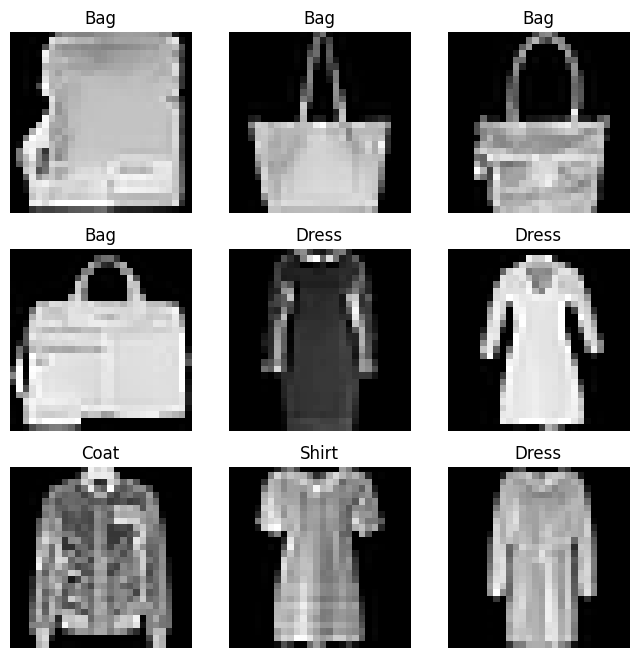

In [22]:
# For a better visualization, we map labels from integer to string.
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()

    # Get image and the corresponding label from the dataset
    img, label = training_data[sample_idx]

    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### 4.2. Dataloader

The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches” and reshuffle the data at every epoch. DataLoader is an iterable that abstracts this complexity for us in an easy API.

In [23]:
from torch.utils.data import DataLoader

# We need to provide the dataloader a dataset, the batch_size, and a flag of reshuffle the data at every epoch or not.
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


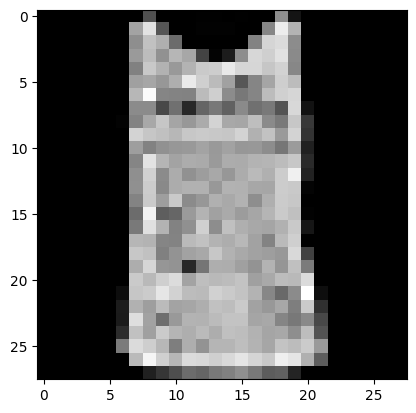

Label: 0


In [24]:
# We can get the minibatch from the dataloader easily
train_features, train_labels = next(iter(train_dataloader))

# Try to change the batch_size in DataLoader in the previous block and see what will change accordingly.
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# Check the 9th example in this minibatch
img = train_features[8].squeeze()
label = train_labels[8]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## 5. Neural Networks

### 5.1. Building a network

Here we show a toy example of how to build a 2-layers MLP for FashionMNIST dataset.

In [25]:
# torch.nn is the main package to build the neural networks
from torch import nn

In [26]:
# GPUs are prefered to train the models. So we need to first set the device.
# Note that we do not have to use GPUs for this exercise.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [27]:
# We define our network here.
# nn.Flatten() is to flatten an image into a tensor.
# nn.Sequential() is an ordered container of modules. For example, here it contains a linear layer, an activate function ReLU, and another linear layer in order.

class NeuralNetwork(nn.Module):
    def __init__(self, hidden_dim = 128):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

### 5.2. Using the model

In [28]:
# We set our model to be the NeuralNetwork. You can adapt the hyper-parameter hidden_dim.

model = NeuralNetwork(hidden_dim = 128).to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [29]:
# Inference from the model
# Set a random input sample
X = torch.rand(1, 28, 28, device=device)

# Put the input sample into the model
logits = model(X)

# Since the model output the logits, we need to convert it into the probability
pred_probab = nn.Softmax(dim=1)(logits)

# we take the position of the maximum probability as our final prediction
y_pred = pred_probab.argmax(1)

print(f"Predicted class: {y_pred}")

Predicted class: tensor([5])


## 6. Loss function and optimizer

To train a model is to optimize a model to an expected state. Thus, we first use a loss function to define the 'difference' between current state and expected state. And then, to minimize the 'difference', we use an optimizer to update the parameters in the model.

### 6.1. Loss function

There are some predefined [loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions) in Pytorch.

MSE is the loss always used in regression tasks. Cross-entropy is the loss always used in classification tasks.

In [30]:
# Example MSE loss
loss_fn = nn.MSELoss()

input = torch.zeros(2, 3)
target = torch.ones(2, 3)

output = loss_fn(input, target)
print(output)

tensor(1.)


In [31]:
loss_fn = nn.CrossEntropyLoss()

input = torch.zeros(3, 4)
target = torch.ones(3, 4)

output = loss_fn(input, target)
print(output)

tensor(5.5452)


### 6.2. Optimizer

Section 3 shows that we can automatically get the gradient for the tensors. However, the gradient is not the one that updates the tensors. To update the tensors, we need an optimizer.

Here, we show how to setup an optimizer. We will show how to use it in Section 6.3.

A fantastic introduction of different optimizers: [An overview of gradient descent optimization algorithms](https://www.ruder.io/optimizing-gradient-descent/).

Note: Adam is the one that is most commonly used. However, sometimes it is not the best choice. Thus, you can always try Adam first to see what will happen.

In [32]:
# We need to provide an optimizer with the parameters need to be optimized.

w = torch.randn(3, 2, requires_grad=True)
model = NeuralNetwork(hidden_dim = 128)

learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### 6.3. Regularization

Regularization is used mainly to prevent overfitting. The most common ways are dropout, L1 regularization, L2 regularization, and batch normalization. Here, we show examples of how to implement that regularization.

In [33]:
# Dropout layer

# Here, we use nn.Dropout to build a dropout layer whose dropout rate is 0.5
dropout_layer = nn.Dropout(p=0.5) 

# We test the dropout layer.
# You can run this block multiple times to see what happen.
# Question: Why the non-zero outputs are 2?
# Hint: check https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html

input = torch.ones(2, 8)
output = dropout_layer(input)

print(output)

tensor([[2., 0., 0., 2., 0., 2., 0., 0.],
        [0., 0., 2., 2., 0., 0., 0., 0.]])


In [34]:
# L1 regularization

# Total loss
loss = 0

# Get the regularization loss
reg_loss = 0
for param in model.parameters():
    reg_loss += torch.norm(param, p=1)

factor = 0.1 #lambda
loss += factor * reg_loss # Add the regularization loss to the total loss with lambda

print(loss)

tensor(185.1304, grad_fn=<AddBackward0>)


In [35]:
# L2 regularization
# We can directly apply L2 regularization through the optimizers from torch.optim

# The parameter weight_decay is the lambda for L2 regularization
# For more details, please check: https://pytorch.org/docs/stable/generated/torch.optim.SGD.html
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=factor)

In [36]:
# Batch Normalization
# Check this link for different kind of normalization: https://scortex.io/batch-norm-folding-an-easy-way-to-improve-your-network-speed/

# With Learnable Parameters
# m = nn.BatchNorm1d(10)

# Without Learnable Parameters: set affine to False
m = nn.BatchNorm1d(10, affine=False)

input_tensor = torch.randn(5, 10)
output_tensor = m(input_tensor)

print('input_tensor:', input_tensor)
print('output_tensor:', output_tensor)

input_tensor: tensor([[ 0.8141, -1.1039, -1.5946,  0.6206, -0.8671,  0.3690, -0.1882, -0.3731,
          0.4527,  1.0567],
        [ 0.7394, -0.4051,  0.2871, -0.5510, -0.0603, -0.3489, -0.0873,  0.8892,
          0.7848, -0.5048],
        [ 1.7551,  1.0212,  1.0766, -1.1815,  0.1446,  1.6327, -0.1859, -0.5547,
         -0.0498, -0.1608],
        [ 0.8198, -1.6834,  0.3866, -0.8267,  0.4779, -0.3264,  0.4664,  0.4268,
          0.1103, -0.1467],
        [-0.2651, -0.3306,  0.9987,  0.8114,  0.8953, -0.7770, -0.3929, -0.1223,
         -0.4451,  0.5530]])
output_tensor: tensor([[ 0.0648, -0.6651, -1.8900,  1.0621, -1.6716,  0.3065, -0.3820, -0.7998,
          0.6694,  1.5874],
        [-0.0520,  0.1050,  0.0582, -0.4087, -0.3027, -0.5427, -0.0334,  1.5684,
          1.4573, -1.1752],
        [ 1.5354,  1.6768,  0.8756, -1.2003,  0.0450,  1.8013, -0.3741, -1.1404,
         -0.5228, -0.5666],
        [ 0.0736, -1.3038,  0.1612, -0.7548,  0.6106, -0.5161,  1.8781,  0.7010,
         -0.1431,

## 7. Training loop

### 7.1. An example of a complete training loop

First, we import the packages. Then we initialize the hyper-parameters. After that, we can define dataset, dataloader, and model.

In [37]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Hyper-parameters
learning_rate = 1e-3
batch_size = 64
epochs = 10

# Build training and test dataset on FashionMNIST
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# Setup the Dataloader for training
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

# Create an MLP with 3 hidden layers
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

After getting the model and data, we need to define our loss function and optimizer.

In [38]:
# Initialize the loss function with the cross-entropy loss
loss_fn = nn.CrossEntropyLoss()

# Initialize the SGD optimizer with the predefined learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

After setting up everything, we can define our training and test loop.

You may notice that we set model to train or test state using model.train() or model.eval(). If you are interested in that, you can try to find the answer to see why this is important for batch normalization and dropout layers. (Hint: batch normalization and dropout layers behave differently during training and evaluation.)

In [39]:
# Define a function of training loop
def train_loop(dataloader, model, loss_fn, optimizer):

    size = len(dataloader.dataset)

    # Set the model to train state
    model.train()
    
    # Load samples from the dataloader
    for batch, (X, y) in enumerate(dataloader):

        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # There are three basic steps for backpropagation:
        # 1. Set the gradient of trainable parameters to 0.
        optimizer.zero_grad()
        # 2. Automatically calculate the gradient of trainable parameters.
        loss.backward()
        # 3. Automatically update the trainable parameters using the gradient.
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Define a function of test loop
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We have defined everything and can start to train our model!

In [40]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.306935  [   64/60000]
loss: 2.293838  [ 6464/60000]
loss: 2.273968  [12864/60000]
loss: 2.265001  [19264/60000]
loss: 2.239794  [25664/60000]
loss: 2.216643  [32064/60000]
loss: 2.222699  [38464/60000]
loss: 2.189472  [44864/60000]
loss: 2.191286  [51264/60000]
loss: 2.145293  [57664/60000]
Test Error: 
 Accuracy: 41.6%, Avg loss: 2.146472 

Epoch 2
-------------------------------
loss: 2.158849  [   64/60000]
loss: 2.151265  [ 6464/60000]
loss: 2.089336  [12864/60000]
loss: 2.113193  [19264/60000]
loss: 2.045648  [25664/60000]
loss: 1.991532  [32064/60000]
loss: 2.014754  [38464/60000]
loss: 1.931304  [44864/60000]
loss: 1.947725  [51264/60000]
loss: 1.866621  [57664/60000]
Test Error: 
 Accuracy: 58.8%, Avg loss: 1.866830 

Epoch 3
-------------------------------
loss: 1.892631  [   64/60000]
loss: 1.868631  [ 6464/60000]
loss: 1.747075  [12864/60000]
loss: 1.802574  [19264/60000]
loss: 1.673091  [25664/60000]
loss: 1.631830  [32064/600

### 7.2. Save and Load the Model

In [41]:
# save the model
torch.save(model.state_dict(), 'model_weights.pth')

In [42]:
# create a new model
model_new = NeuralNetwork()
print('Before loading the pretrained model:')
test_loop(test_dataloader, model_new, loss_fn)

# load the model
model_new.load_state_dict(torch.load('model_weights.pth'))
print('After loading the pretrained model:')
test_loop(test_dataloader, model_new, loss_fn)

Before loading the pretrained model:
Test Error: 
 Accuracy: 14.1%, Avg loss: 2.300248 

After loading the pretrained model:
Test Error: 
 Accuracy: 70.7%, Avg loss: 0.785070 



### 7.3. Practice here!

Let's do some practice here. The goal is to make us more familiar with the content we learn in this exercise. Also, you can play with the framework. For example, changing datasets, adapting hyper-parameters, modifying the structure of the neural network.

In [43]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Hyper-parameters
learning_rate = 1e-3
batch_size = 64
epochs = 10

# ToDo: build training and test dataset on FashionMNIST
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    transform=ToTensor()
)

# ToDo: Setup the Dataloader for training
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# ToDo: Create an MLP with 3 hidden layers
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim=28*28, hidden_dim=512, output_dim=10):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [44]:
# cross entropy loss for multiclass classification
loss_fn = nn.CrossEntropyLoss()

# stochastic gradient descent for optimisation
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [45]:
# Define a function of training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    # set model to train stage
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        logits = model(X)
        loss = loss_fn(logits, y)

        # clear out gradients and backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Define a function of test loop
def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [46]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.303812  [   64/60000]
loss: 0.581422  [ 6464/60000]
loss: 0.357149  [12864/60000]
loss: 0.440463  [19264/60000]
loss: 0.433140  [25664/60000]
loss: 0.575057  [32064/60000]
loss: 0.417530  [38464/60000]
loss: 0.277129  [44864/60000]
loss: 0.573463  [51264/60000]
loss: 0.341910  [57664/60000]
Test Error: 
 Accuracy: 85.3%, Avg loss: 0.412447 

Epoch 2
-------------------------------
loss: 0.423631  [   64/60000]
loss: 0.248817  [ 6464/60000]
loss: 0.543331  [12864/60000]
loss: 0.136781  [19264/60000]
loss: 0.341195  [25664/60000]
loss: 0.310660  [32064/60000]
loss: 0.244566  [38464/60000]
loss: 0.422910  [44864/60000]
loss: 0.430771  [51264/60000]
loss: 0.461437  [57664/60000]
Test Error: 
 Accuracy: 86.6%, Avg loss: 0.375689 

Epoch 3
-------------------------------
loss: 0.300238  [   64/60000]
loss: 0.327075  [ 6464/60000]
loss: 0.427456  [12864/60000]
loss: 0.383949  [19264/60000]
loss: 0.354616  [25664/60000]
loss: 0.207523  [32064/600

In [47]:
# save the model
torch.save(model.state_dict(), 'model_weights_custom.pth')

In [49]:
# create a new model
new_model = NeuralNetwork()
print('Before loading the pretrained model:')
test_loop(test_dataloader, new_model, loss_fn)

# load the model
new_model.load_state_dict(torch.load('model_weights_custom.pth'))
print('After loading the pretrained model:')
test_loop(test_dataloader, new_model, loss_fn)

Before loading the pretrained model:
Test Error: 
 Accuracy: 12.1%, Avg loss: 2.306741 

After loading the pretrained model:
Test Error: 
 Accuracy: 88.8%, Avg loss: 0.319881 

